# Import modules needed

In [1]:
%%time
import sys
sys.path.append('..')

CPU times: user 9 µs, sys: 0 ns, total: 9 µs
Wall time: 13.4 µs


In [2]:
%%time
from source.code.data_downloader import DataDownloader
from source.code.custom_tokenizer import CustomTokenizer
from source.code.visualization import plot_word_clouds

CPU times: user 942 ms, sys: 86.4 ms, total: 1.03 s
Wall time: 1.51 s


In [3]:
%%time
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")

CPU times: user 737 µs, sys: 65 µs, total: 802 µs
Wall time: 777 µs


# Read data

Выгрузим данные, пока в виде не очищенных документов и меток классов:

In [4]:
%%time
data_downloader = DataDownloader('../data/datasets/')


INITIALIZING...
INITIALIZATION HAS BEEN COMPLETED


CPU times: user 3.04 ms, sys: 179 µs, total: 3.22 ms
Wall time: 2.38 ms


In [5]:
%%time
documents, labels_true, label_names = data_downloader.extract_documents()

Files reading and documents extraction: 100%|██████████| 20/20 [00:02<00:00,  7.79it/s]

CPU times: user 2.44 s, sys: 95.4 ms, total: 2.53 s
Wall time: 2.57 s


# Distribution of document counts by cluster

Глянем, как документы распределены по меткам:

In [6]:
document_sizes = list(map(len, documents))

In [7]:
document_sizes = pd.DataFrame(data={'size': document_sizes, 'label': labels_true})

In [8]:
document_sizes.head()

label  size
0      0     0
1      0   763
2      0   646
3      0   888
4      0   652

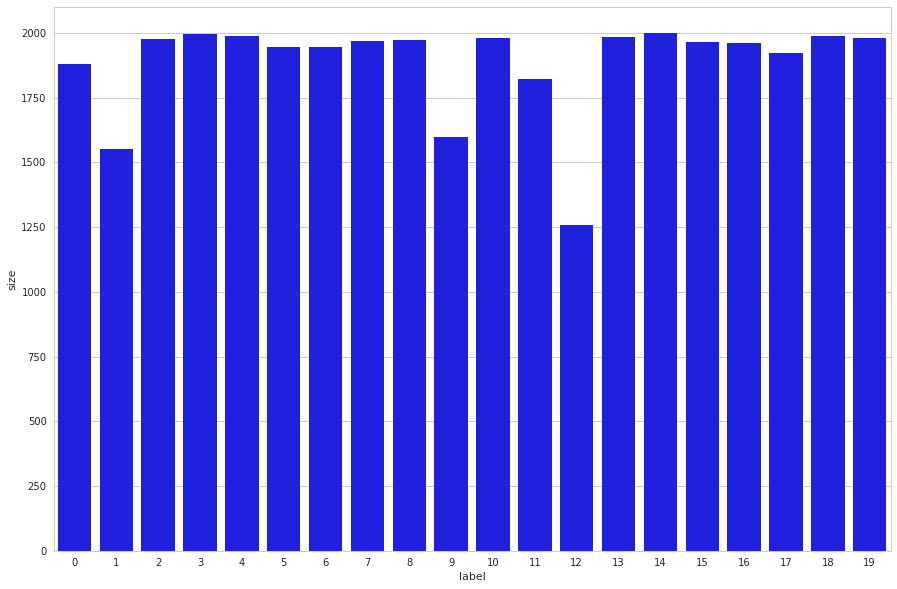

In [9]:
plt.figure(figsize=(15, 10))
sns.barplot(
    x="label",
    y="size",
    data=document_sizes.groupby('label').agg(len).reset_index(),
    label="Total",
    color="b"
)
plt.show()

Распределение более-менее равномерное, однако этот график не отображает того, как распределена масса текста по кластерам.

Чтобы выяснить это, посмотрим, как распределены длины текстов в зависимости от темы:

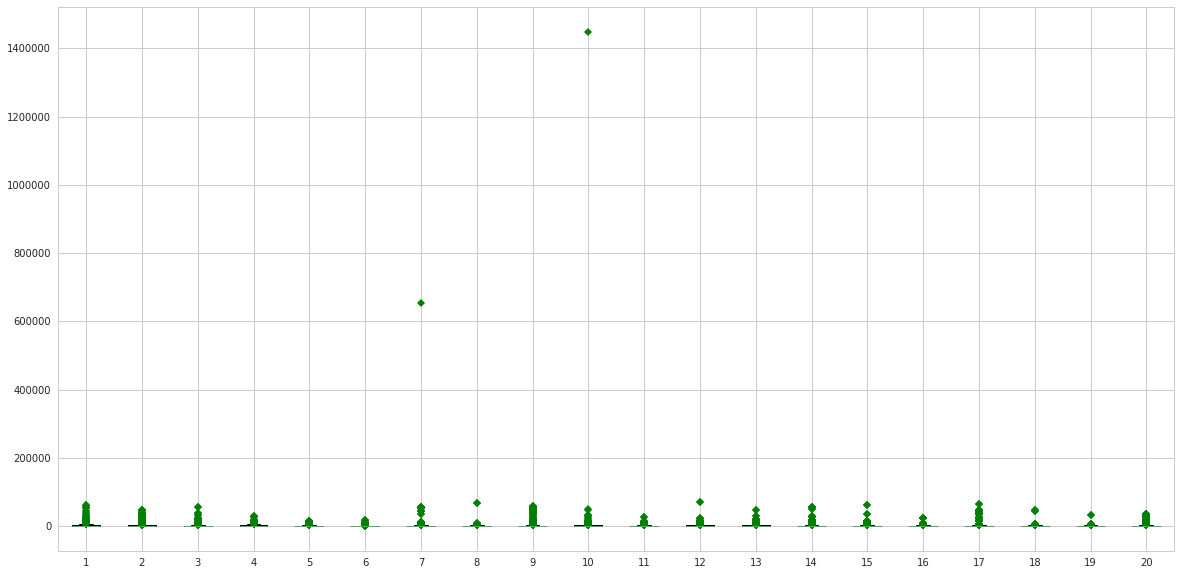

In [10]:
plt.figure(figsize=(20, 10))
plt.boxplot([document_sizes[document_sizes.label == i]['size'].values for i in range(20)], 0, 'gD')
plt.show()

Есть парочка довольно длинных текстов. Глянем, что это за опусы:

In [11]:
document_sizes[document_sizes['size'] > 600000]

label     size
11336      6   654195
17221      9  1447982

Пожалуй эти два текста будут только мешать:

In [12]:
documents.pop(17221)
documents.pop(11336)
labels_true.pop(17221)
labels_true.pop(11336)

6

In [13]:
document_sizes = list(map(len, documents))

In [14]:
document_sizes = pd.DataFrame(data={'size': document_sizes, 'label': labels_true})

In [15]:
document_sizes.head()

label  size
0      0     0
1      0   763
2      0   646
3      0   888
4      0   652

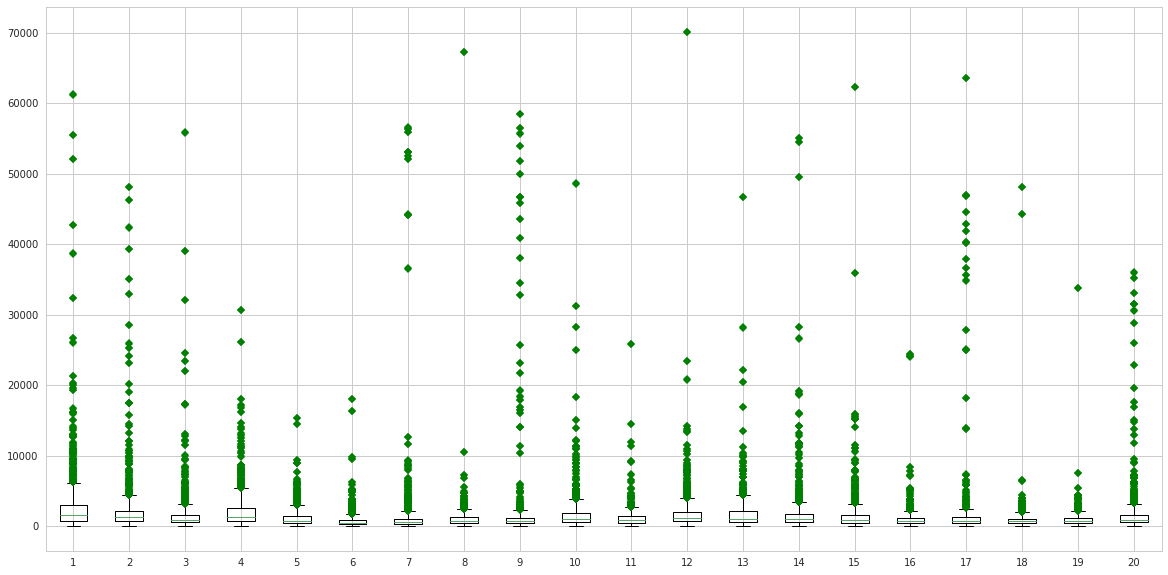

In [16]:
plt.figure(figsize=(20, 10))
plt.boxplot([document_sizes[document_sizes.label == i]['size'].values for i in range(20)], 0, 'gD')
plt.show()

Так немного лучше.

# Documents tokenization

Теперь посмотрим на то, что получилось при токенизации текстов:

In [17]:
tokenizer = CustomTokenizer()
tokenized_documents = tokenizer.fit_transform(documents)

Documents tokenization: 100%|██████████| 37678/37678 [02:29<00:00, 251.90it/s]


# Clusters visualisation

Теперь надо глянуть, насколько характерны определенные слова для определенных кластеров:

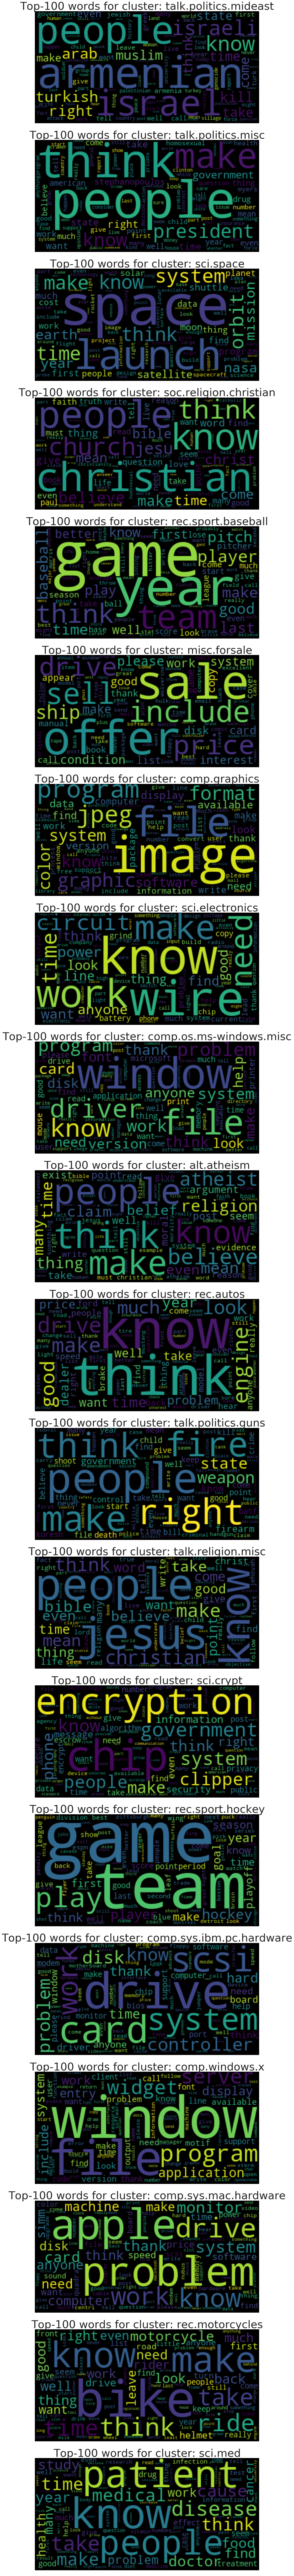

In [18]:
plot_word_clouds(tokenized_documents, labels=labels_true, label_names=label_names, top_features=100)

# Conclusion

Итак, пока есть 